In [1]:
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from VAN_new import *

In [4]:
def get_column(matrix, i):
    return torch.tensor([matrix[j][i] for j in range(len(matrix))])

In [2]:

def energie1D(spin): 
    spin_copie=spin.clone()
    spin_copie[spin_copie==0]=-1
    spin_copie_1 = torch.roll(spin_copie, -1)
    spin_copie_2 = torch.roll(spin_copie, 1)    
    energie=- torch.sum(spin_copie_1*spin_copie+spin_copie_2*spin_copie)
    return energie
    


In [5]:
def energie2D(lattice):
    energie = 0 
    for i in range(len(lattice)):
        energie+=energie1D(lattice[0])
    for j in range(len(lattice[0])):
        column = get_column(lattice, j)
        energie+=energie1D(column)
    return energie


    
energie2D(torch.tensor([[1, 1, 1], [1, 1, 1], [1, 1, 1]]))

tensor(-36)

In [93]:

def log_prob_energie(beta, energie):
    return -beta*energie


def log_prob_target_energie(spins, beta):
    
    log_probs = torch.ones(spins.shape[0]) * np.log(0.001)
    for i in range(len(log_probs)):
        racine=spins[i].shape[0]
        racine=(int(np.sqrt(racine)))
        lattice = spins[i].reshape(racine, racine)
        log_probs[i] = log_prob_energie(beta, energie2D(lattice))
    return log_probs 

In [94]:
beta_c=0.5*np.log(1+np.sqrt(2))
beta_c

0.44068679350977147

In [95]:
taille=9

In [96]:
beta=0.1

Epoch 0: 1.0327473878860474
Epoch 100: -0.1370750218629837
Epoch 200: -0.28241264820098877
Epoch 300: -0.36413195729255676
Epoch 400: -0.19808954000473022
Epoch 500: -0.11755194514989853
Epoch 600: -0.081861712038517
Epoch 700: -0.04850438982248306
Epoch 800: -0.026539770886301994
Epoch 900: -0.03536875173449516


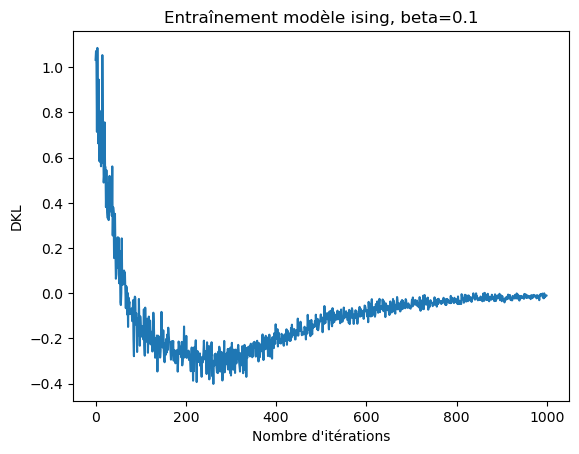

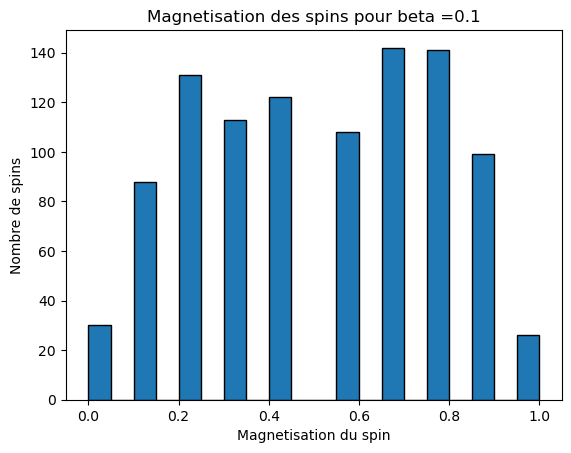

Epoch 0: 0.8280114531517029
Epoch 100: -1.0248615741729736
Epoch 200: -0.8719316124916077
Epoch 300: -0.8764944672584534
Epoch 400: -0.8125444054603577
Epoch 500: -0.7516749501228333
Epoch 600: -0.6789877414703369
Epoch 700: -0.4434308707714081
Epoch 800: -0.6444854140281677
Epoch 900: -0.3596092164516449


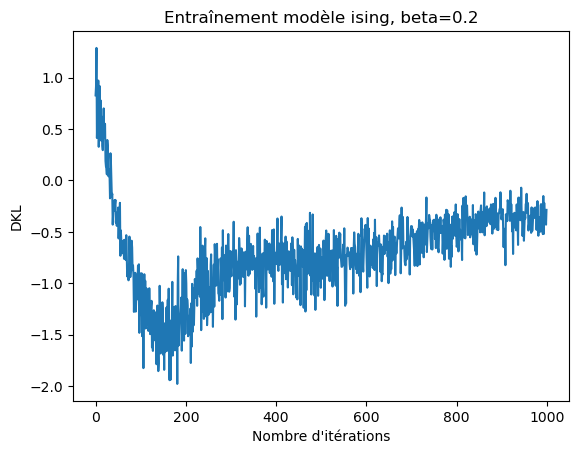

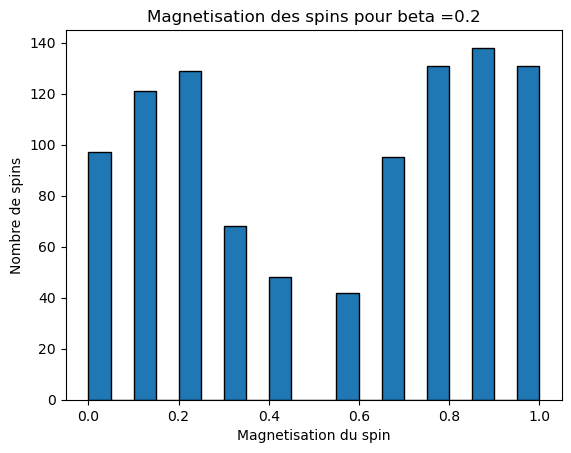

Epoch 0: 1.8890646696090698
Epoch 100: -5.028611660003662
Epoch 200: -2.318124771118164
Epoch 300: -0.5884071588516235
Epoch 400: -0.7913995981216431
Epoch 500: -1.1774297952651978
Epoch 600: -0.6660387516021729
Epoch 700: -0.33360424637794495
Epoch 800: -0.2310444712638855
Epoch 900: -0.16707056760787964


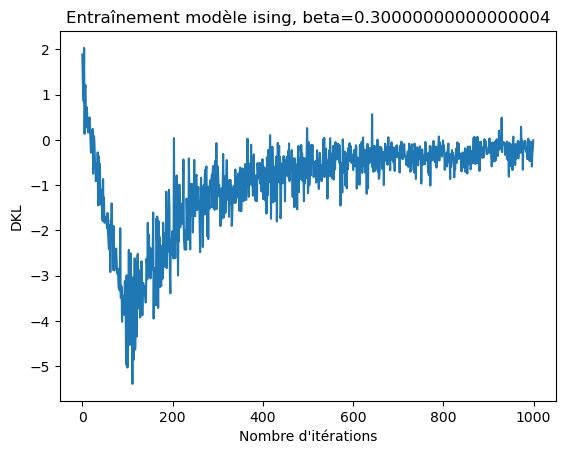

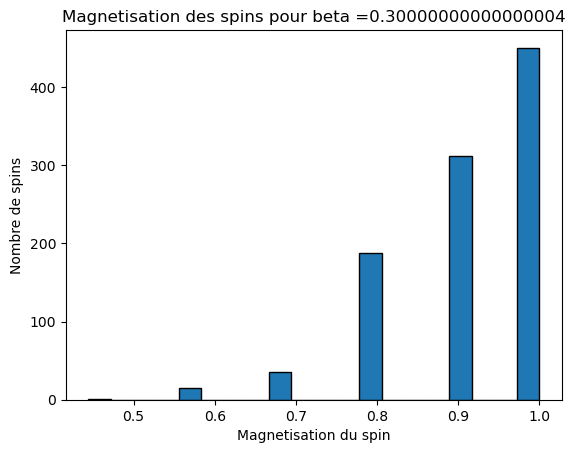

Epoch 0: 1.7126586437225342
Epoch 100: -2.6600732803344727
Epoch 200: -3.884082317352295
Epoch 300: -0.5866629481315613
Epoch 400: -2.512592077255249
Epoch 500: -0.8274941444396973
Epoch 600: -0.4511357247829437
Epoch 700: -0.13587288558483124
Epoch 800: -0.37787064909935
Epoch 900: -0.5872239470481873


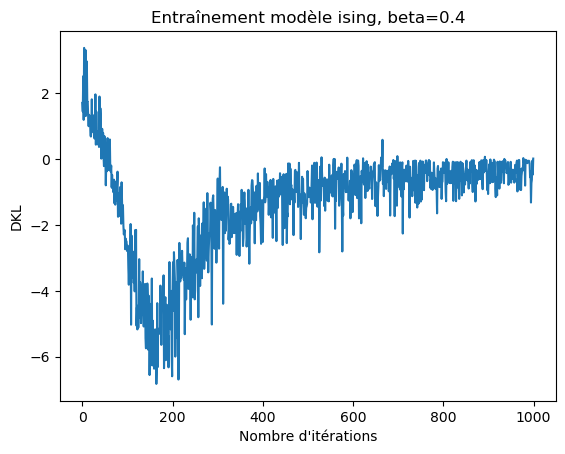

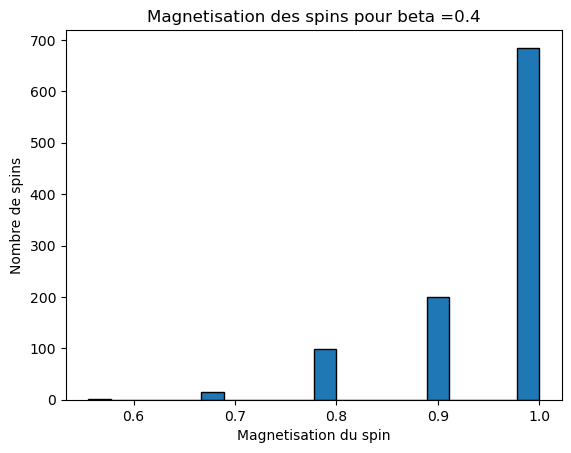

Epoch 0: 1.2298705577850342
Epoch 100: -3.766611337661743
Epoch 200: -9.307415962219238
Epoch 300: -3.8927853107452393
Epoch 400: -0.0181664377450943
Epoch 500: -0.8969233632087708
Epoch 600: -0.55294269323349
Epoch 700: -0.5782762765884399
Epoch 800: 0.007941593416035175
Epoch 900: -0.616300106048584


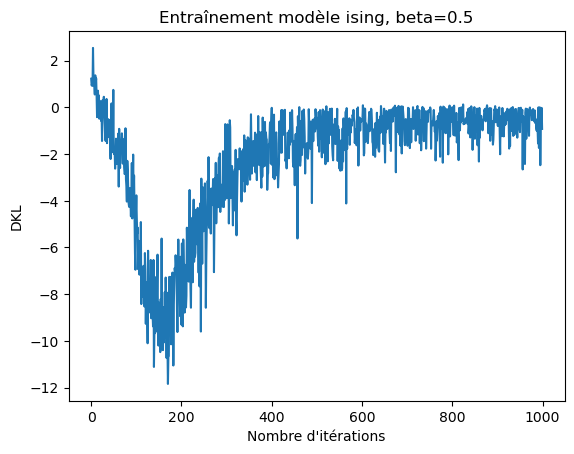

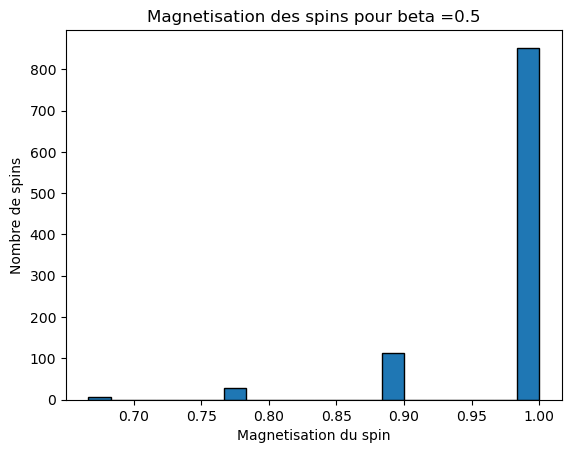

Epoch 0: 1.458321213722229
Epoch 100: -4.883014678955078
Epoch 200: -9.528133392333984
Epoch 300: -4.66054105758667
Epoch 400: -5.071676731109619
Epoch 500: -1.3516746759414673
Epoch 600: -3.377845525741577
Epoch 700: -0.40189746022224426
Epoch 800: -1.5452457666397095
Epoch 900: -1.7282631397247314


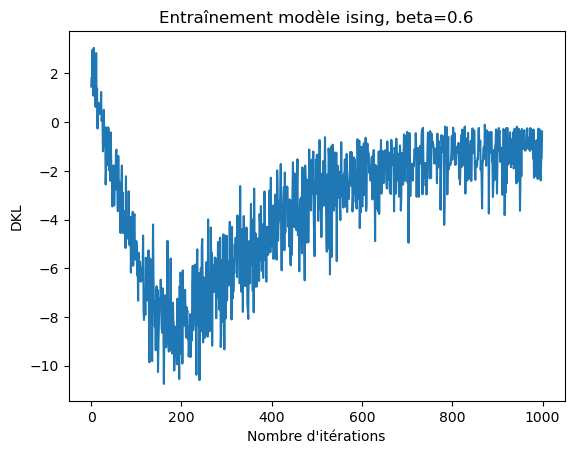

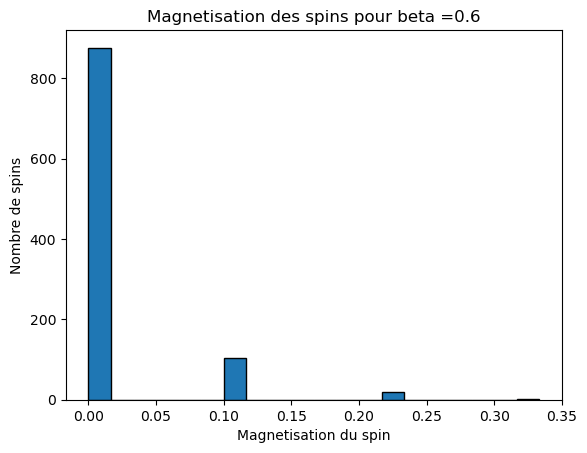

In [104]:
for i in range(6):
    beta=0.1+0.1*i
    mymodel1 = VAN(taille)
    losses = train(mymodel1, lambda x:  log_prob_target_energie(x, beta), batch_size=100, n_iter=1000, lr=0.01)
    plt.plot(losses)
    plt.xlabel('Nombre d\'itérations')
    plt.ylabel('DKL')
    plt.title('Entraînement modèle ising, beta=' + str(beta))
    plt.savefig('train_beta_' + str(beta) + '.png')
    plt.show()
    
    mysample=mymodel1.sample(1000)
    magnetisations=[]
    for spin in mysample:
        magnetisations.append(torch.mean(spin))
    plt.hist(magnetisations, bins=20, edgecolor='black') 
    plt.xlabel('Magnetisation du spin')
    plt.ylabel('Nombre de spins')
    plt.title('Magnetisation des spins pour beta =' + str(beta))
    plt.savefig('magnetisation_beta_' + str(beta) + '.png')
    plt.show()
    

Text(0.5, 1.0, 'Magnetisation des spins pour beta =0.1')

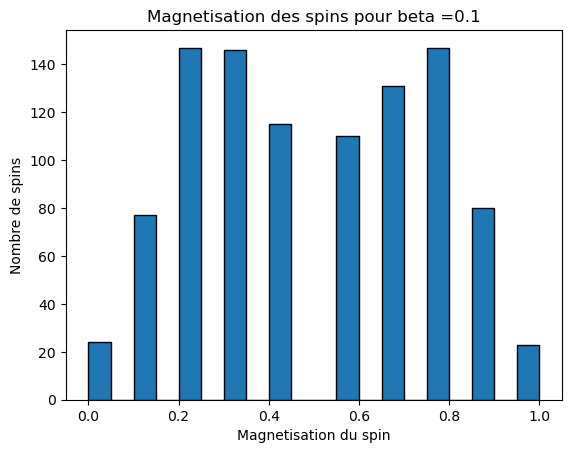

In [99]:
mysample=mymodel1.sample(1000)
magnetisations=[]
for spin in mysample:
    magnetisations.append(torch.mean(spin))
plt.hist(magnetisations, bins=20, edgecolor='black', align='mid')
plt.xlabel('Magnetisation du spin')
plt.ylabel('Nombre de spins')
plt.title('Magnetisation des spins pour beta =' + str(beta))